# Assignment 5 V2 Exercise 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import bernoulli
from scipy.special import expit
from tqdm import trange

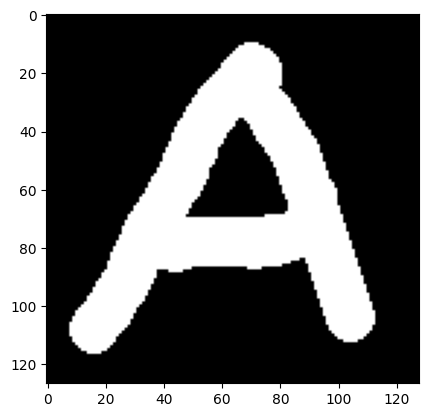

In [3]:
img = pd.read_csv('letterA.csv').to_numpy()
plt.imshow(img, cmap="gray")
plt.show()

In [4]:
def create_salt_pepp_flip(flip_prob, img_shape):
    mu = 1 - flip_prob
    samples = bernoulli.rvs(mu, size=img_shape)
    flip = 2 * samples - 1
    return flip


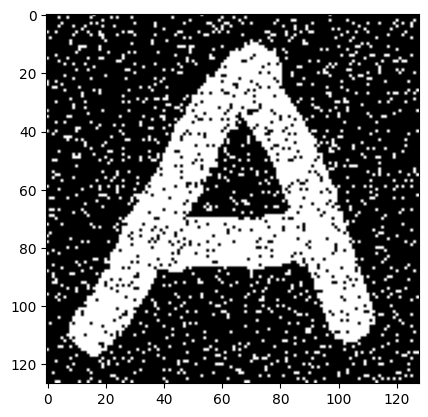

In [5]:
flip_prob = 0.1
salt_pepp_flip = create_salt_pepp_flip(flip_prob, img.shape)
noisy_img = img * salt_pepp_flip
plt.imshow(noisy_img, cmap="gray")
plt.show()


In [6]:
# test_im = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])

def find_neighbour_idxs_from_idx(idx, img_shape):

    height, width = img_shape
    maxidx = (height*width) - 1

    neighbours = []
    if idx >= width: # not a top row pixel
        neighbours.append(idx-width) # add top neighbour

    if idx % width != 0: # not a leftmost col pixel
        neighbours.append(idx-1)

    if (idx+1) % width != 0: # not a rightmost col pixel
        neighbours.append(idx+1)

    if idx < (maxidx-width+1): # not a bot row pixel
        neighbours.append(idx+width) # add bot neighbour

    return neighbours


# idx = 5
# img_shape = test_im.shape
# neighbours_idx = find_neighbour_idxs_from_idx(idx, img_shape)


100%|██████████| 50/50 [00:12<00:00,  4.10it/s]


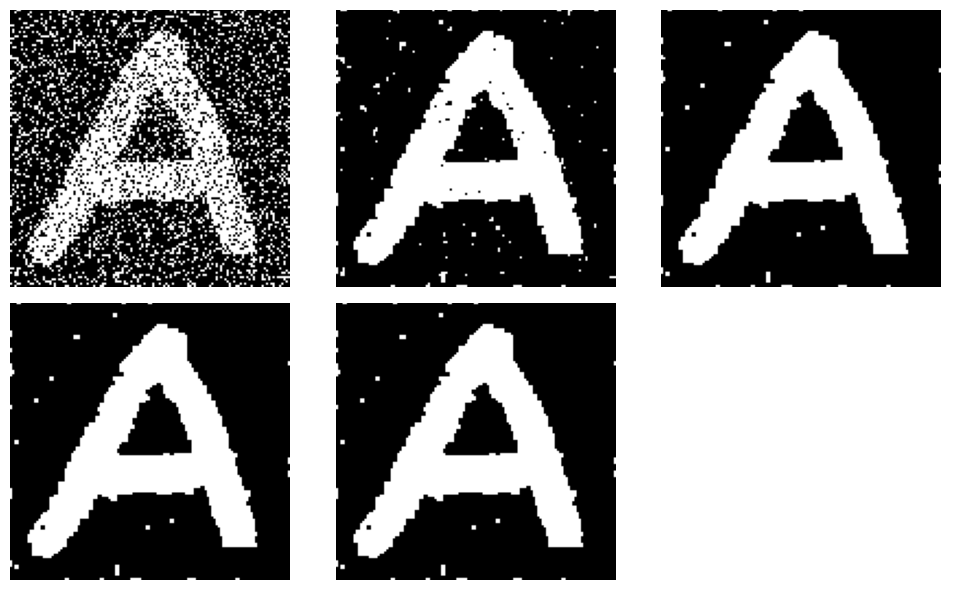

In [ ]:
def denoise_gibbs(x,y, img_shape, eta=1, beta=1, n_iterations=50, save_iteration=[0, 4, 14, 49]):
    saved_images = [x.copy().reshape(img_shape)]


    for iteration in trange(n_iterations):
        for idx in range(len(x)):
            neighbours_idx = find_neighbour_idxs_from_idx(idx,img.shape)

            prob = expit( 2 * (eta*y[idx] + beta*np.sum(x[neighbours_idx]))) # probability of x_idx = 1 from lecture
            
            if prob < 0.5:
                x[idx] = -1
            else:
                x[idx] = 1
        if iteration in save_iteration:
            saved_images.append(x.copy().reshape(img_shape))

    return saved_images


def plot_images_in_grid_with_titles(images, grid_shape=(2, 3), figsize=(10, 6), titles=None):
    """
    Plots a list of images in a grid with titles.

    Args:
        images (list of np.ndarray): List of images to be plotted.
        grid_shape (tuple): The shape of the grid (rows, columns).
        figsize (tuple): The size of the figure.
        titles (list of str): List of titles for each image.

    Returns:
        None
    """
    rows, cols = grid_shape
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    for idx, ax in enumerate(axes.flat):
        if idx < len(images):
            ax.imshow(images[idx], cmap='gray')  # Use 'gray' if images are grayscale
            ax.axis('off')  # Turn off the axis for better visualization
            if titles and idx < len(titles):
                ax.set_title(titles[idx], fontsize=10)
        else:
            ax.axis('off')  # Turn off unused subplots
    
    plt.tight_layout()
    plt.show()



x_noisefree = img.flatten().reshape(-1,1)

flip_prob = 0.2
salt_pepp_flip = create_salt_pepp_flip(flip_prob, img_shape = x_noisefree.shape)
y = x_noisefree * salt_pepp_flip
x = y.copy()

saved_images = denoise_gibbs(x,y, beta=1, eta=1, img_shape=img.shape, n_iterations=50)


title_idxs = [0, 1, 5, 15, 50]
titles = [f"Iteration {i}" for i in title_idxs]

plot_images_in_grid_with_titles(saved_images, grid_shape=(2, 3), figsize=(10, 6), titles=titles)


